# Single cell graphs - build and preprocess:

Get single cells (nodes), adjacency matrix (edges) and node features

##1. Helper functions:

In [ ]:
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from scipy.sparse import coo_matrix
from scipy import sparse
from scipy.sparse import rand
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
import numpy as np
import warnings
warnings.filterwarnings("ignore")


def degree_list(adjacency_matrix):
    return np.sum(adjacency_matrix, axis=1)

def getDAdj(Adj_M,d):
  DAdj = (Adj_M < d)*1
  
  for i in range(len(DAdj)):
    a = DAdj[i,:]
    if np.sum(a)==0:
      print('disconnected node!')

  return DAdj 


In [ ]:
def prepare_graphs_label_v3(DB1,celltype,mylabel):

    allgraphs_train=[]
    list_IDs = DB1['metabricId']
    unique = list_IDs.unique()
    IDS=[]
    overallncells=[]
    myfeats = pd.DataFrame(columns = celltype)
    for m in range(len(unique)):
      print(m)
      #for m in range(5):
      # For each patient
      k = unique[m]
      # get the rows that belong to its slice
      slide=DB1[DB1['metabricId']==k]
      coords= slide[['Location_Center_X','Location_Center_Y']]
      array_coords=coords.to_numpy()

      #adjM using centroid coords
      slide= slide.fillna(0)
      Adj_M = squareform(pdist(slide[['Location_Center_X','Location_Center_Y']]))
      kNN_adj = getDAdj(Adj_M,40)
      np.savetxt('/single_cell_graphs_distances/'+ str(40) + '_' + k + "_AdjM.csv", kNN_adj, delimiter=",")
      #feats dict using the sum of each marker + number of cells per supercell + mean distance between cells in the supercell
      nfeats = slide[celltype]
      myfeats =  myfeats.append(slide ,ignore_index=True)
      nfeats_arr = nfeats.values #returns a numpy array
            
    return allgraphs_train,myfeats 

In [ ]:
def prepare_graphs_label_test(DB1,ks,celltype,mylabel):

    allgraphs_train=[]
    list_IDs = DB1['core']
    unique = list_IDs.unique()
    IDS=[]
    overallncells=[]
    myfeats = pd.DataFrame(columns = celltype)
    for m in range(len(unique)):
      print(m)
      #for m in range(5):
      # For each patient
      k = unique[m]
      # get the rows that belong to its slice
      slide=DB1[DB1['core']==k]
      coords= slide[['Location_Center_X','Location_Center_Y']]
      array_coords=coords.to_numpy()

      #adjM using centroid coords
      slide= slide.fillna(0)
      Adj_M = squareform(pdist(slide[['Location_Center_X','Location_Center_Y']]))
      kNN_adj = getDAdj(Adj_M,40)
      np.savetxt('/single_cell_graphs_distances/'+ str(40) + '_' + k + "_AdjM.csv", kNN_adj, delimiter=",")
       #feats dict using the sum of each marker + number of cells per supercell + mean distance between cells in the supercell
      nfeats = slide[celltype]
      myfeats =  myfeats.append(slide ,ignore_index=True)
      nfeats_arr = nfeats.values #returns a numpy array
            
    return allgraphs_train,myfeats 

## 2. Load data

In [ ]:
import pandas as pd

#database with the single cell data from METABRIC
db_org = pd.read_csv('/inputs/single_cell_data.csv')

#load the train, test and val split
db_train = pd.read_csv("/inputs/train.csv")
db_dev = pd.read_csv("/inputs/dev.csv")
db_test = pd.read_csv("/inputs/internal_test.csv")

#get the cells only in each set 
db_train_raw = db_org[db_org['metabricId'].isin(db_train['metabricId'])]
db_dev_raw = db_org[db_org['metabricId'].isin(db_dev['metabricId'])]
db_test_raw = db_org[db_org['metabricId'].isin(db_test['Metabric.Id'])]



In [ ]:

#load the database with the single cell data from Basel
db = pd.read_csv("/inputs/Basel.csv")
## change the names of the external validation stains so they match the ones used in METABRIC
db['CK19']= db['3111576Nd143Di Cytoker']
db['CK8_18']= db['971099Nd144Di Cytoker']
db['CD68']= db['77877Nd146Di CD68'] 
db['CK14']= db['346876Sm147Di Keratin']
db['SMA']= db['174864Nd148Di SMA'] 
db['Vimentin']= db['1921755Sm149Di Vimenti'] 
db['HER2']= db[ '201487Eu151Di cerbB']
db['CD3']= db[ '8001752Sm152Di CD3epsi']
db['PR']= db[ '312878Gd158Di Progest']
db['p53']= db[ '207736Tb159Di p53']
db['CD44']= db[ '6967Gd160Di CD44']
#db['EpCAM']= db['3111576Nd143Di Cytoker'] this staining was bad and was not included
db['CD45']= db['71790Dy162Di CD45']
db['GATA3']= db['117792Dy163Di GATA3']
db['CD20']= db['361077Dy164Di CD20']
db['E_cadherin']= db['1031747Er167Di ECadhe']
db['Ki67']= db[ '1441101Er168Di Ki67']
db['EGFR']= db[ '1021522Tm169Di EGFR']
db['pS6']= db[ 'phospho S6']
db['vWF_CD31']= db[ '378871Yb172Di vWF' ]
db['CK7']= db['98922Yb174Di Cytoker']
db['panCK']= db['234832Lu175Di panCyto']
db['c_PARP_c_Casp3']= db[ '198883Yb176Di cleaved']
db['CK5']= db[ '651779Pr141Di Cytoker']
db['Fibronectin']= db[ '3281668Nd142Di Fibrone']

#load the database with the single cell data from Basel
db2 = pd.read_csv("/content/drive/MyDrive/IMC breast cancer exploratory/GitHub repo/inputs/Zurich.csv")
db2['CK19']= db2['3111576Nd143Di Cytoker']
db2['CK8_18']= db2['971099Nd144Di Cytoker']
db2['CD68']= db2['77877Nd146Di CD68'] 
db2['CK14']= db2['346876Sm147Di Keratin']
db2['SMA']= db2['174864Nd148Di SMA'] 
db2['Vimentin']= db2['1921755Sm149Di Vimenti'] 
db2['HER2']= db2[ '201487Eu151Di cerbB']
db2['CD3']= db2[ '8001752Sm152Di CD3epsi']
db2['PR']= db2[ '312878Gd158Di Progest']
db2['p53']= db2[ '207736Tb159Di p53']
db2['CD44']= db2[ '6967Gd160Di CD44']
#db['EpCAM']= db['3111576Nd143Di Cytoker'] this staining was bad and was not included
db2['CD45']= db2['71790Dy162Di CD45']
db2['GATA3']= db2['117792Dy163Di GATA3']
db2['CD20']= db2['361077Dy164Di CD20']
db2['E_cadherin']= db2['1031747Er167Di ECadhe']
db2['Ki67']= db2[ '1441101Er168Di Ki67']
db2['EGFR']= db2[ '1021522Tm169Di EGFR']
db2['pS6']= db2[ 'phospho S6']
db2['vWF_CD31']= db2[ '378871Yb172Di vWF' ]
db2['CK7']= db2['98922Yb174Di Cytoker']
db2['panCK']= db2['234832Lu175Di panCyto']
db2['c_PARP_c_Casp3']= db2[ '198883Yb176Di cleaved']
db2['CK5']= db2[ '651779Pr141Di Cytoker']
db2['Fibronectin']= db2[ '3281668Nd142Di Fibrone']

# 3. Process each cohort

Metabric train

In [ ]:
celltype = ['CK19', 'CK8_18', 'CD68', 'CK14', 'SMA', 'Vimentin', 'CD3', 'p53', 'CD44', 'CD45', 'CD20',  'Ki67',
       'EGFR', 'pS6', 'vWF_CD31', 'CK7', 'panCK', 'CK5',
       'Fibronectin']

In [ ]:

allgraphs,nfeats_train= prepare_graphs_label_v3(db_train_raw,celltype,'ER.Status')
nfeats_train.to_csv('/single_cell_graphs_distances/'+'nfeats_train.csv')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


Metabric development set

In [ ]:
allgraphs,nfeats_dev= prepare_graphs_label_v3(db_dev_raw,celltype,'ER.Status')
nfeats_dev.to_csv('/single_cell_graphs_distances/'+'nfeats_dev.csv')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


Metabric internal test set

In [ ]:
allgraphs,nfeats_test= prepare_graphs_label_v3(db_test_raw,celltype,'ER.Status')
nfeats_test.to_csv('/single_cell_graphs_distances/'+'nfeats_test_MB.csv')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [ ]:
allgraphs,nfeats_test_bas= prepare_graphs_label_test(db,celltype,'ER.Status')
nfeats_test_bas.to_csv('/single_cell_graphs_distances/'+'nfeats_test_Basel.csv')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
allgraphs,nfeats_test_zuri= prepare_graphs_label_test(db2,celltype,'ER.Status')
nfeats_test_zuri.to_csv('/single_cell_graphs_distances/'+'nfeats_test_Zurich.csv')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Scaling using train set parameters 

In [ ]:
import pandas as pd

In [ ]:
nfeats_internaltest = pd.read_csv('/single_cell_graphs_distances/'+'nfeats_test_MB.csv')
nfeats_dev = pd.read_csv('/single_cell_graphs_distances/'+'nfeats_dev.csv')
nfeats_train = pd.read_csv('/single_cell_graphs_distances/'+'nfeats_train.csv')
nfeats_Bastest = pd.read_csv('/single_cell_graphs_distances/'+'nfeats_test_Basel.csv')
nfeats_Zuritest = pd.read_csv('/single_cell_graphs_distances/'+'nfeats_test_Zurich.csv')

In [ ]:

train_p = nfeats_train
dev_p = nfeats_dev
test_p_internal = nfeats_internaltest
nfeats_test_B = nfeats_Bastest
nfeats_test_Z = nfeats_Zuritest

test_p_B = nfeats_Bastest
test_p_Z = nfeats_Zuritest

stains = ['CK19', 'CK8_18', 'CD68', 'CK14', 'SMA', 'Vimentin', 'HER2', 'CD3',
       'PR', 'p53', 'CD44', 'CD45', 'GATA3', 'CD20', 'E_cadherin', 'Ki67',
       'EGFR', 'pS6', 'vWF_CD31', 'CK7', 'panCK', 'c_PARP_c_Casp3', 'CK5',
       'Fibronectin']

for j in range(24):
  i = stains[j]
  A = nfeats_train[i]
  A[A==0]=0.000000001
  A = np.log(A.values)
  B = nfeats_dev[i]
  B[B==0]=0.000000001
  B = np.log(B.values)
  C = nfeats_test_B[i]
  C[C==0]=0.000000001
  C = np.log(C.values)
  D = nfeats_test_Z[i]
  D[D==0]=0.000000001
  D = np.log(D.values)
  E = nfeats_internaltest[i]
  E[E==0]=0.000000001
  E = np.log(E.values)
  scaler = preprocessing.StandardScaler()
  train_p[i+'_scaled'] = scaler.fit_transform(A.reshape(-1, 1))
  dev_p[i+'_scaled'] = scaler.transform(B.reshape(-1, 1))
  test_p_B[i+'_scaled'] = scaler.transform(C.reshape(-1, 1))
  test_p_Z[i+'_scaled'] = scaler.transform(D.reshape(-1, 1))
  test_p_internal[i+'_scaled'] = scaler.transform(E.reshape(-1, 1))
  

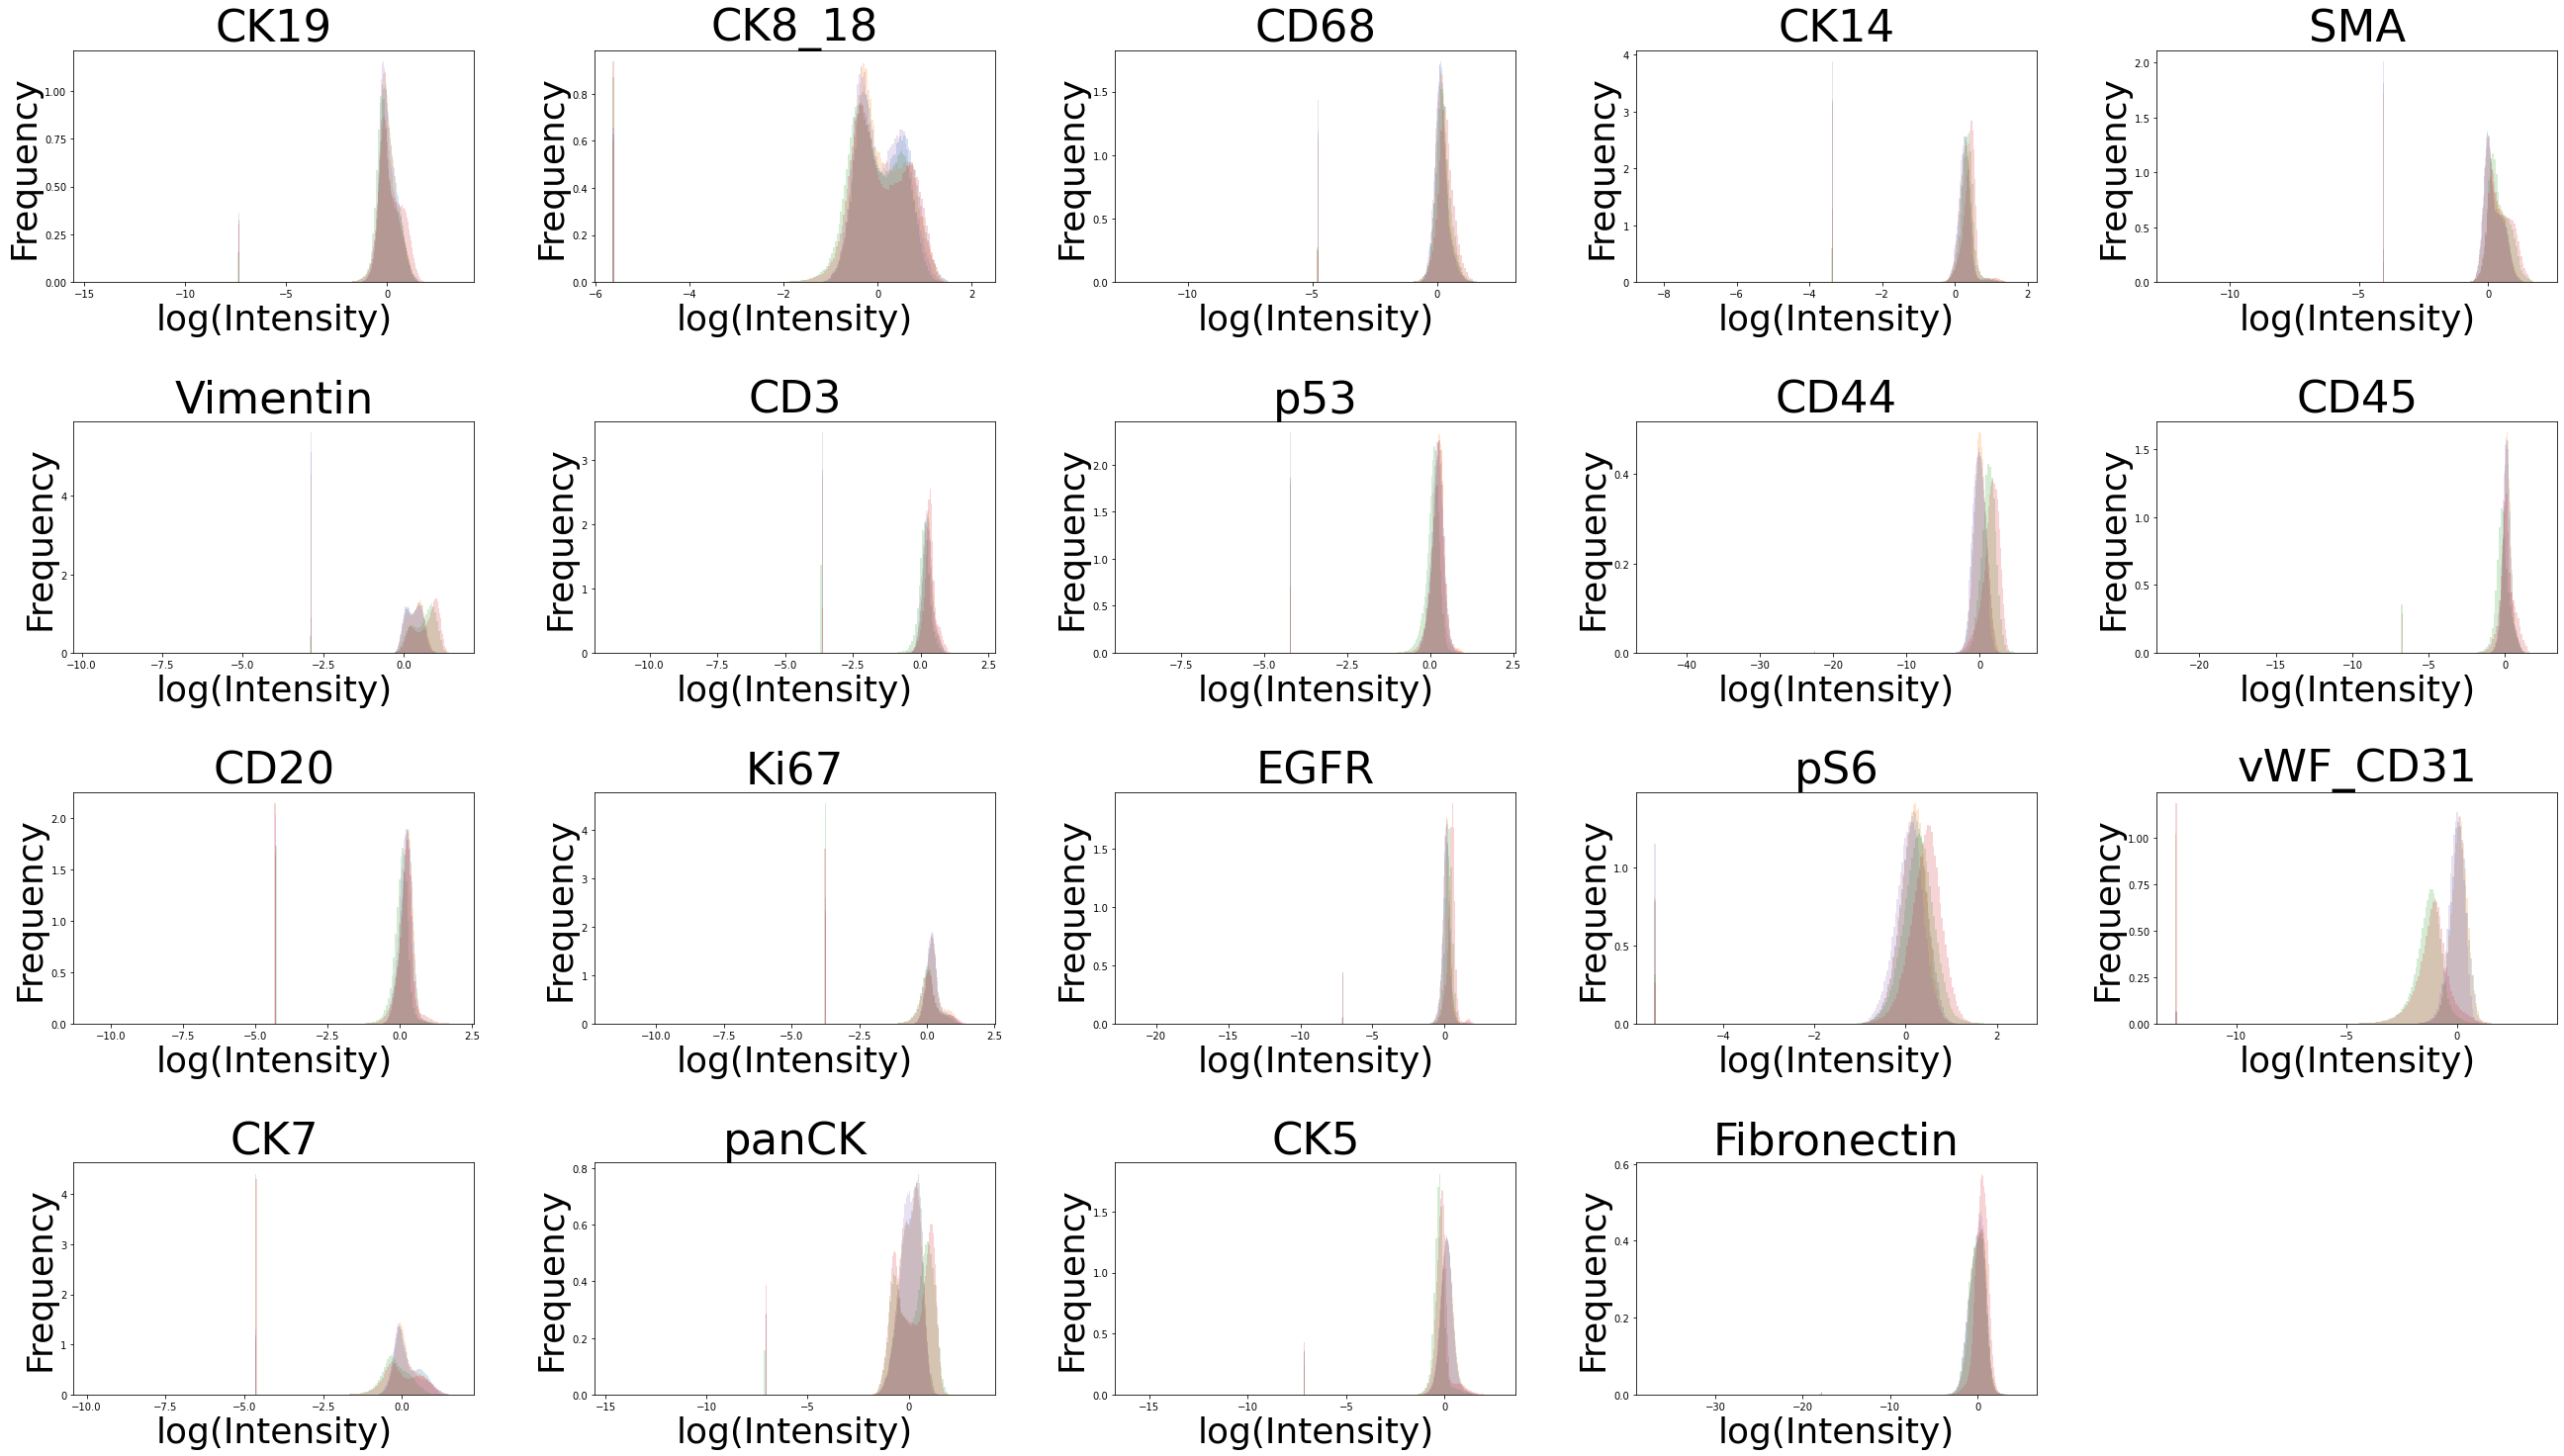

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,5, figsize=(45, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=.3)

axs = axs.ravel()

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

stains = ['CK19','CK8_18','CD68','CK14','SMA','Vimentin', 'CD3','p53','CD44','CD45',
    'CD20','Ki67','EGFR','pS6','vWF_CD31','CK7','panCK','CK5','Fibronectin']


for j in range(len(stains)):
  
  i = stains[j]
  plt.figure()
  axs[j].hist(train_p[i+'_scaled'].values, bins=200, alpha=0.2, label="train",density=True)
  axs[j].hist(dev_p[i+'_scaled'].values, bins=200, alpha=0.2, label="development",density=True)
  axs[j].hist(test_p_B[i+'_scaled'].values, bins=200, alpha=0.2, label="Basel test",density=True)
  axs[j].hist(test_p_Z[i+'_scaled'].values, bins=200, alpha=0.2, label="Zurich test",density=True)
  axs[j].hist(test_p_internal[i+'_scaled'].values, bins=200, alpha=0.2, label="Internal test",density=True)
  axs[j].set_title(i, size=45)
  axs[j].set_ylabel("Frequency", size=36)
  axs[j].set_xlabel("log(Intensity)", size=36)
  #axs[count1, count2].legend(loc='upper right')

axs[19].set_frame_on(False)
axs[19].set_visible(False)
axs[19].set_visible(False)
axs[19].plot(0, 0, marker='o', color='r', label = 'line1')
axs[19].plot(0, 0, marker='o', color='b', label = 'line2')
axs[19].legend(loc = 'lower right')
plt.show()

In [ ]:
train_p.to_csv('/single_cell_graphs_distances/nfeats_train_scaled_v3.csv')
dev_p.to_csv('/single_cell_graphs_distances/nfeats_dev_scaled_v3.csv')


test_p_B.to_csv('/single_cell_graphs_distances/nfeats_test_B_scaled_v3.csv')
test_p_Z.to_csv('/single_cell_graphs_distances/nfeats_test_Z_scaled_v3.csv')
test_p_internal.to_csv('/single_cell_graphs_distances/nfeats_test_internal_scaled_v3.csv')

In [ ]:
train_p = nfeats_train
dev_p = nfeats_dev
test_p_internal = nfeats_internaltest
nfeats_test_B = nfeats_Bastest
nfeats_test_Z = nfeats_Zuritest

test_p_B = nfeats_Bastest
test_p_Z = nfeats_Zuritest


stains = ['CK19', 'CK8_18', 'CD68', 'CK14', 'SMA', 'Vimentin', 'HER2', 'CD3',
       'PR', 'p53', 'CD44', 'CD45', 'GATA3', 'CD20', 'E_cadherin', 'Ki67',
       'EGFR', 'pS6', 'vWF_CD31', 'CK7', 'panCK', 'c_PARP_c_Casp3', 'CK5',
       'Fibronectin']

for j in range(24):
  i = stains[j]
  A = nfeats_train[i]
  A[A==0]=0.000000001
  A = np.log(A.values)
  B = nfeats_dev[i]
  B[B==0]=0.000000001
  B = np.log(B.values)
  C = nfeats_test_B[i]
  C[C==0]=0.000000001
  C = np.log(C.values)
  D = nfeats_test_Z[i]
  D[D==0]=0.000000001
  D = np.log(D.values)
  E = nfeats_internaltest[i]
  E[E==0]=0.000000001
  E = np.log(E.values)
  scaler = preprocessing.StandardScaler()
  train_p[i+'_scaled'] = scaler.fit_transform(A.reshape(-1, 1))
  dev_p[i+'_scaled'] = scaler.transform(B.reshape(-1, 1))
  test_p_B[i+'_scaled'] = scaler.transform(C.reshape(-1, 1))
  test_p_Z[i+'_scaled'] = scaler.transform(D.reshape(-1, 1))
  test_p_internal[i+'_scaled'] = scaler.transform(E.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to b

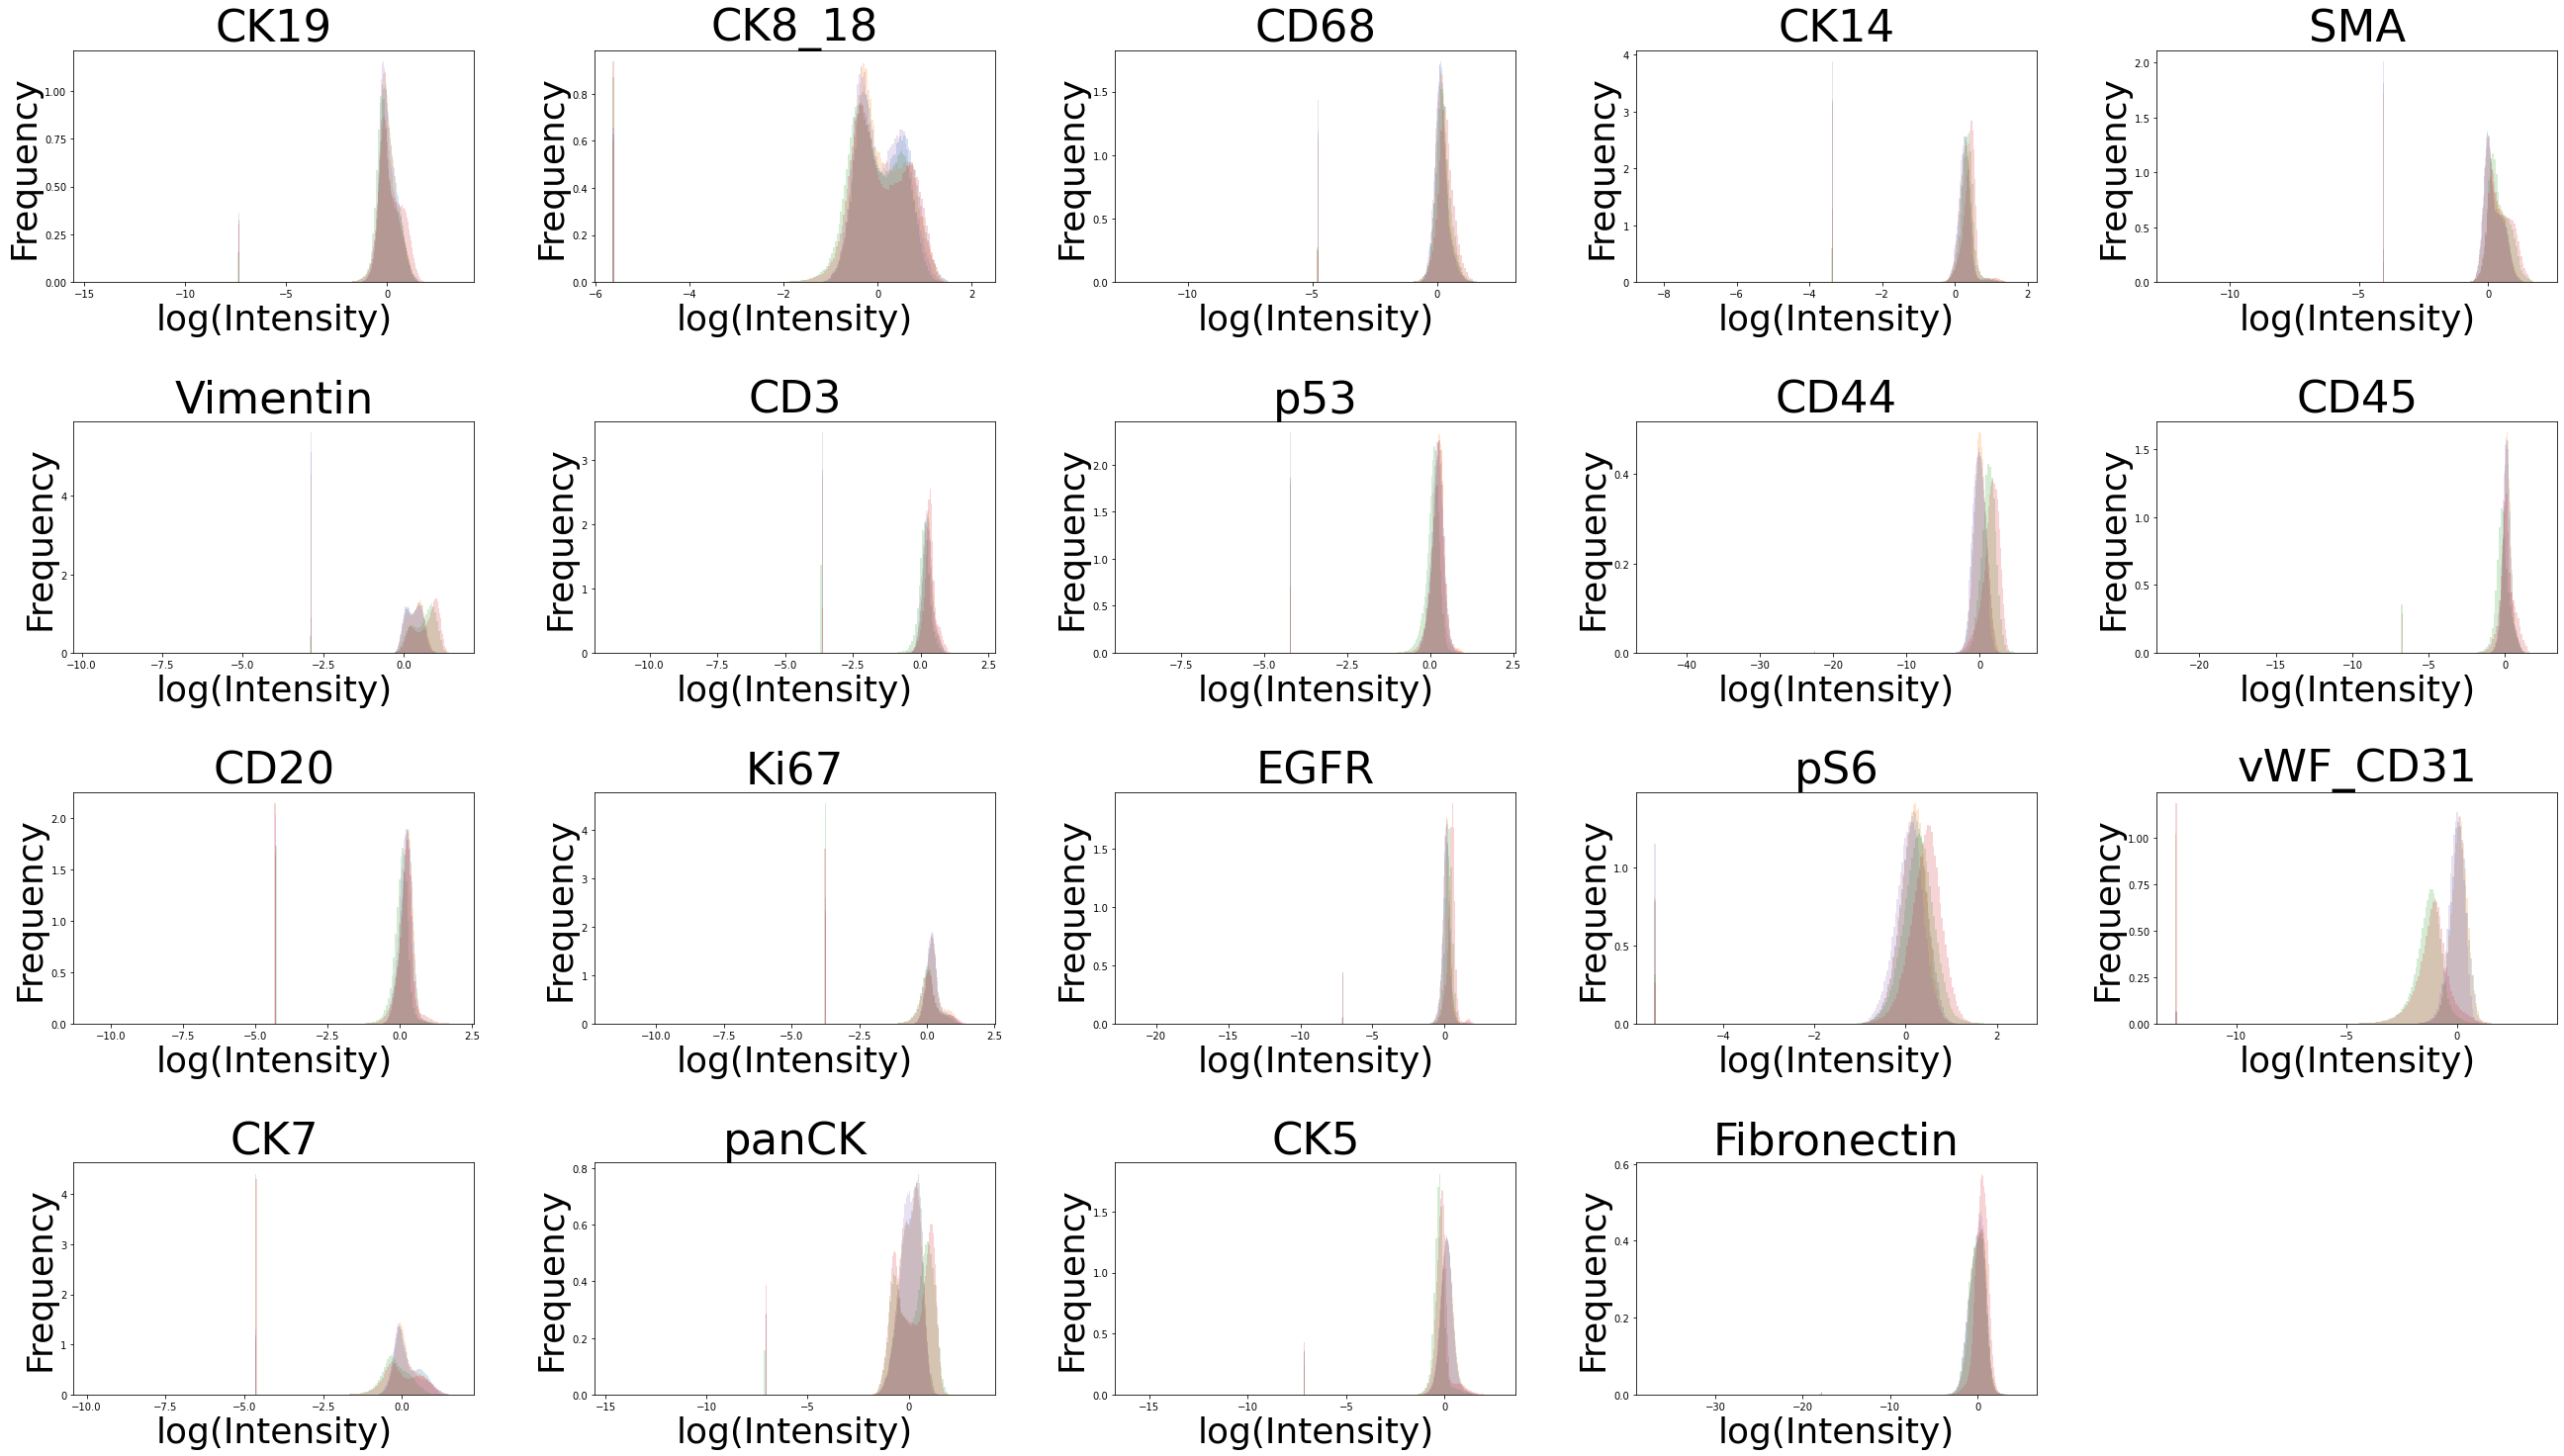

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(45, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=.3)

axs = axs.ravel()

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

stains = ['CK19','CK8_18','CD68','CK14','SMA','Vimentin', 'CD3','p53','CD44','CD45',
    'CD20','Ki67','EGFR','pS6','vWF_CD31','CK7','panCK','CK5','Fibronectin']


for j in range(len(stains)):
  
  i = stains[j]
  plt.figure()
  axs[j].hist(train_p[i+'_scaled'].values, bins=200, alpha=0.2, label="train",density=True)
  axs[j].hist(dev_p[i+'_scaled'].values, bins=200, alpha=0.2, label="development",density=True)
  axs[j].hist(test_p_B[i+'_scaled'].values, bins=200, alpha=0.2, label="Basel test",density=True)
  axs[j].hist(test_p_Z[i+'_scaled'].values, bins=200, alpha=0.2, label="Zurich test",density=True)
  axs[j].hist(test_p_internal[i+'_scaled'].values, bins=200, alpha=0.2, label="Internal test",density=True)
  axs[j].set_title(i, size=45)
  axs[j].set_ylabel("Frequency", size=36)
  axs[j].set_xlabel("log(Intensity)", size=36)
  #axs[count1, count2].legend(loc='upper right')

axs[19].set_frame_on(False)
axs[19].set_visible(False)
axs[19].set_visible(False)
axs[19].plot(0, 0, marker='o', color='r', label = 'line1')
axs[19].plot(0, 0, marker='o', color='b', label = 'line2')
axs[19].legend(loc = 'lower right')
plt.show()

In [ ]:
train_p.to_csv('/single_cell_graphs/nfeats_train_scaled_v3.csv')
dev_p.to_csv('/single_cell_graphs/nfeats_dev_scaled_v3.csv')
test_p_B.to_csv('/single_cell_graphs/external_test_set/nfeats_test_B_scaled_v3.csv')
test_p_Z.to_csv('/single_cell_graphs/external_test_set/nfeats_test_Z_scaled_v3.csv')
test_p_internal.to_csv('/single_cell_graphs/nfeats_test_internal_scaled_v3.csv')

# Scaling using the parameters from each cohort and setting zeros to the same value

In [ ]:
train_p = nfeats_train
dev_p = nfeats_dev
test_p_internal = nfeats_internaltest
nfeats_test_B = nfeats_Bastest
nfeats_test_Z = nfeats_Zuritest

test_p_B = nfeats_Bastest
test_p_Z = nfeats_Zuritest


stains = ['CK19', 'CK8_18', 'CD68', 'CK14', 'SMA', 'Vimentin', 'HER2', 'CD3',
       'PR', 'p53', 'CD44', 'CD45', 'GATA3', 'CD20', 'E_cadherin', 'Ki67',
       'EGFR', 'pS6', 'vWF_CD31', 'CK7', 'panCK', 'c_PARP_c_Casp3', 'CK5',
       'Fibronectin']

for j in range(24):
  i = stains[j]
  A = nfeats_train[i]
  A[A==0]=0.000000001
  A = np.log(A.values)
  B = nfeats_dev[i]
  B[B==0]=0.000000001
  B = np.log(B.values)
  C = nfeats_test_B[i]
  C[C==0]=0.000000001
  C = np.log(C.values)
  D = nfeats_test_Z[i]
  D[D==0]=0.000000001
  D = np.log(D.values)
  E = nfeats_internaltest[i]
  E[E==0]=0.000000001
  E = np.log(E.values)
  scaler = preprocessing.StandardScaler()
  train_p[i+'_scaled'] = scaler.fit_transform(A.reshape(-1, 1))
  scaler = preprocessing.StandardScaler()
  dev_p[i+'_scaled'] = scaler.fit_transform(B.reshape(-1, 1))
  scaler = preprocessing.StandardScaler()
  test_p_B[i+'_scaled'] = scaler.fit_transform(C.reshape(-1, 1))
  scaler = preprocessing.StandardScaler()
  test_p_Z[i+'_scaled'] = scaler.fit_transform(D.reshape(-1, 1))
  scaler = preprocessing.StandardScaler()
  test_p_internal[i+'_scaled'] = scaler.fit_transform(E.reshape(-1, 1))

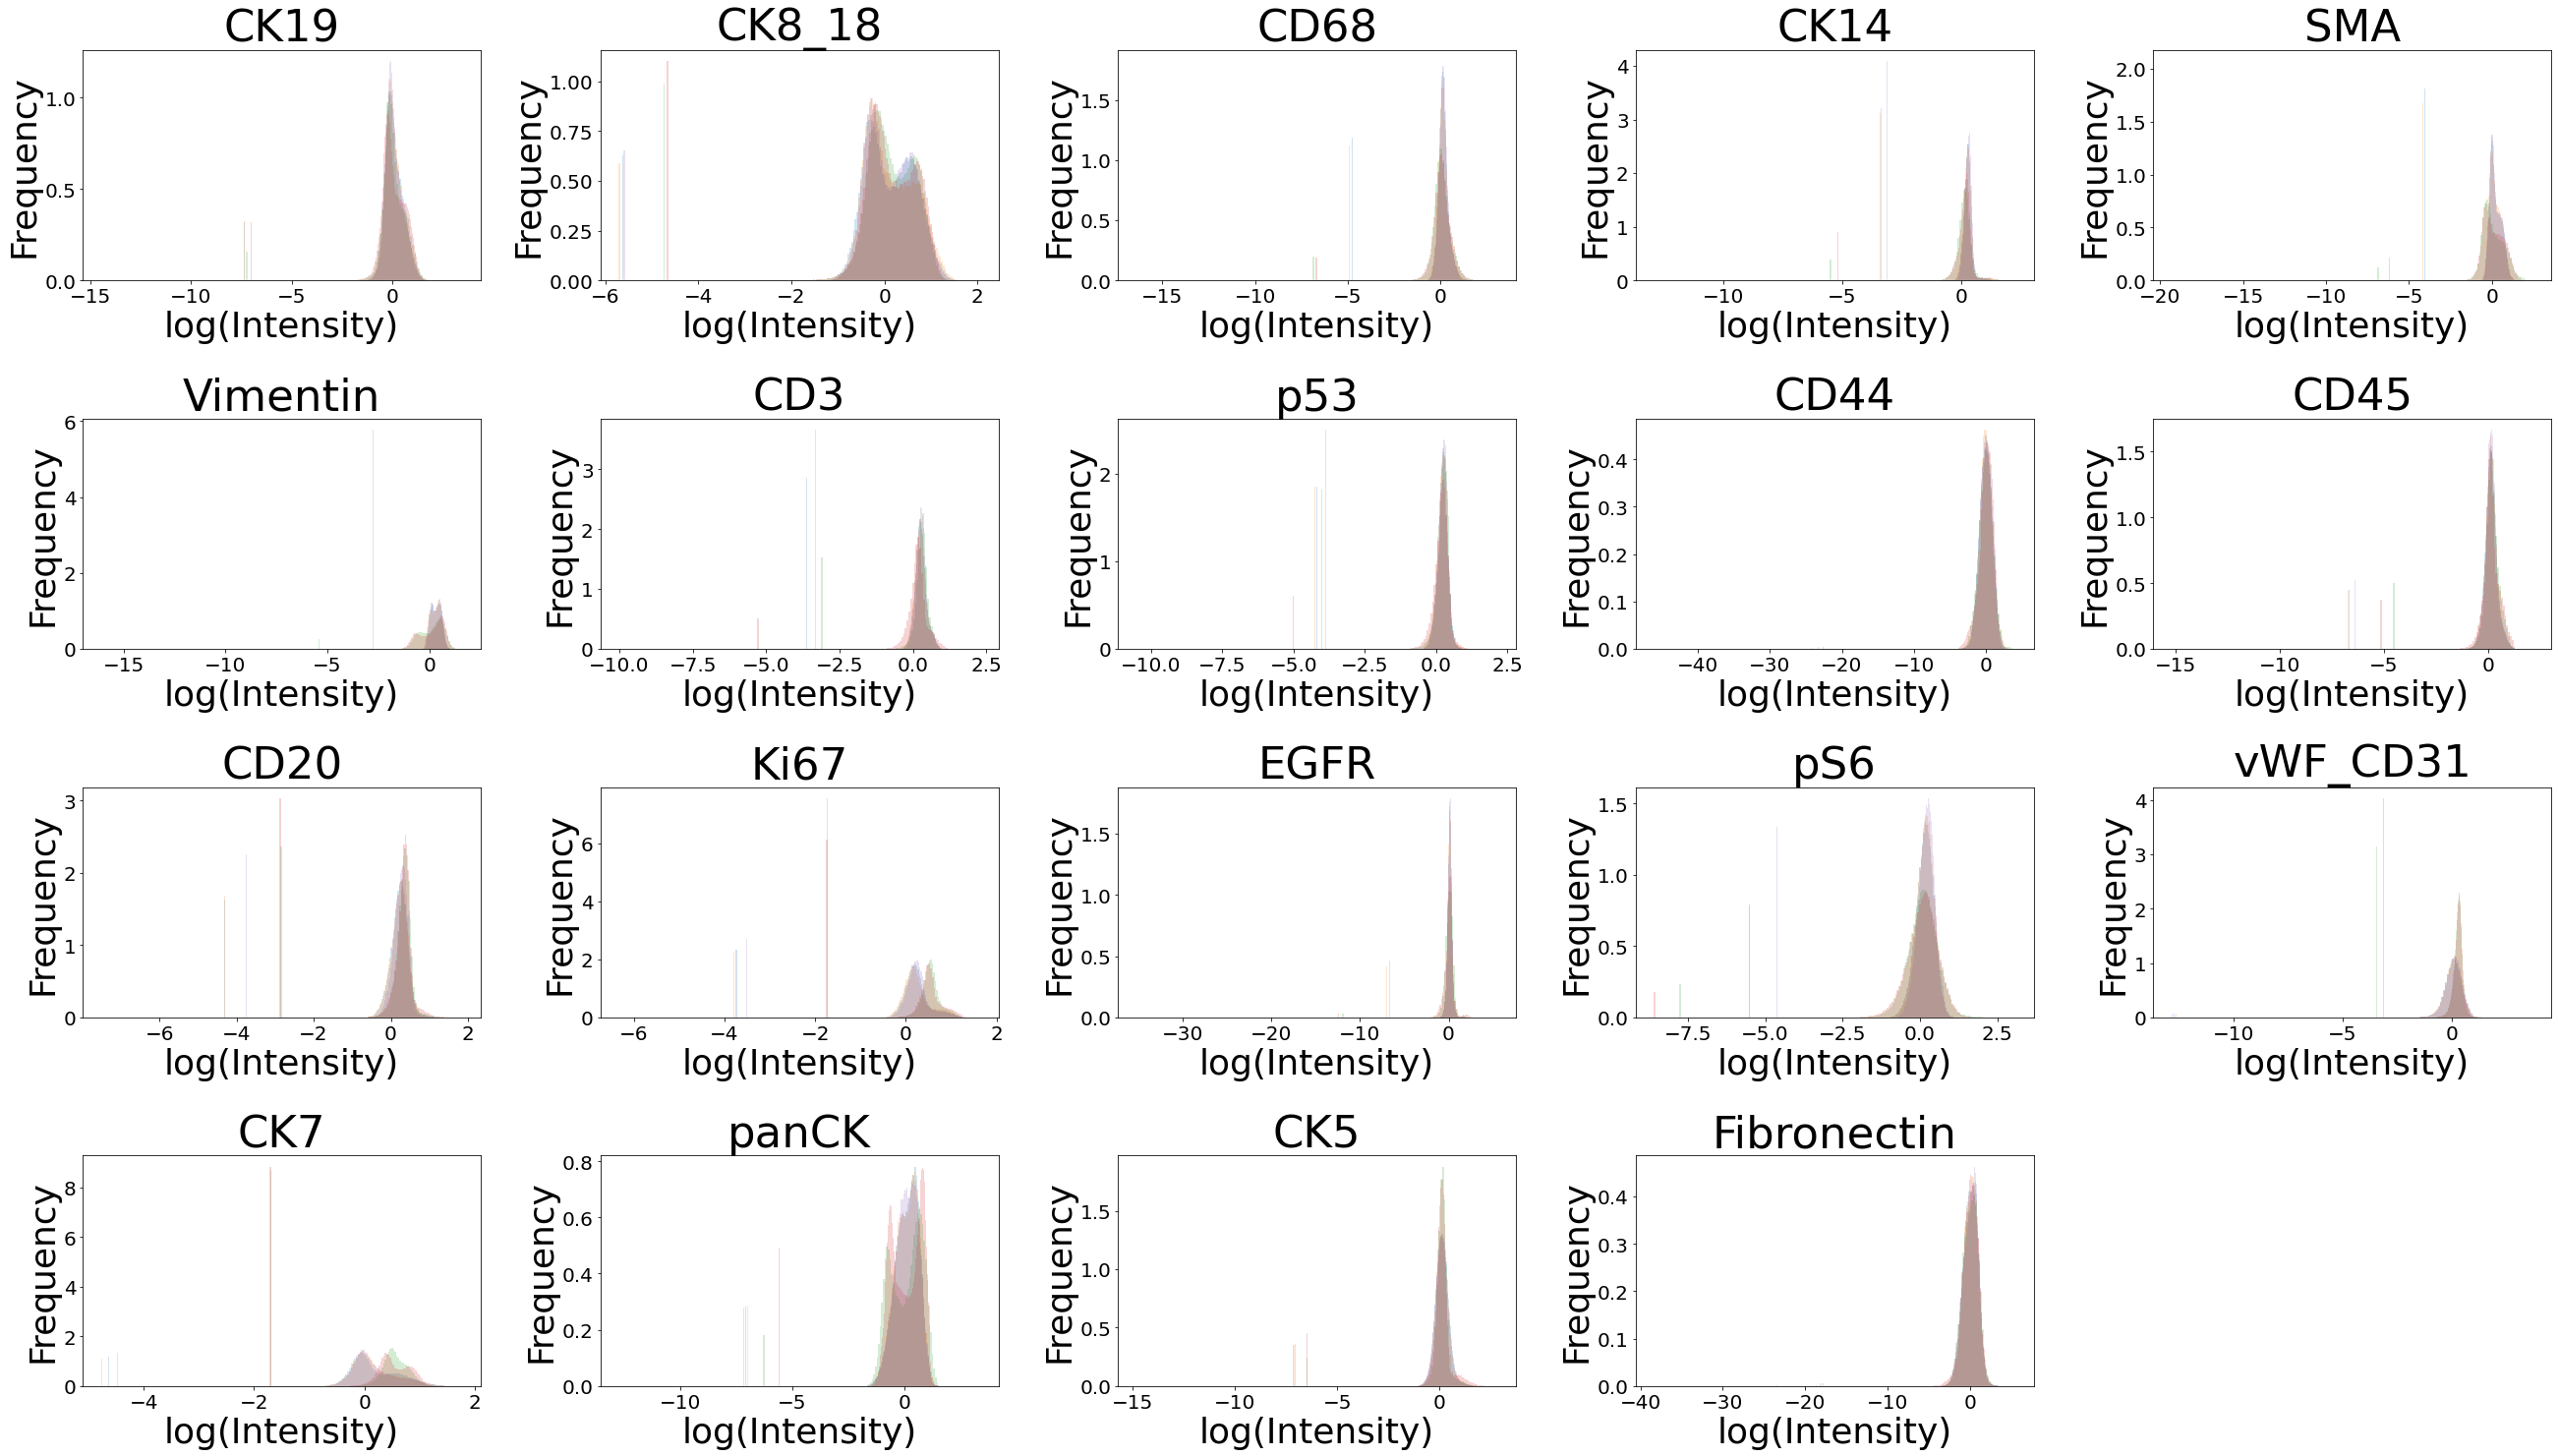

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(45, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=.3)

axs = axs.ravel()

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

stains = ['CK19','CK8_18','CD68','CK14','SMA','Vimentin', 'CD3','p53','CD44','CD45',
    'CD20','Ki67','EGFR','pS6','vWF_CD31','CK7','panCK','CK5','Fibronectin']


for j in range(len(stains)):
  
  i = stains[j]
  plt.figure()
  axs[j].hist(train_p[i+'_scaled'].values, bins=200, alpha=0.2, label="train",density=True)
  axs[j].hist(dev_p[i+'_scaled'].values, bins=200, alpha=0.2, label="development",density=True)
  axs[j].hist(test_p_B[i+'_scaled'].values, bins=200, alpha=0.2, label="Basel test",density=True)
  axs[j].hist(test_p_Z[i+'_scaled'].values, bins=200, alpha=0.2, label="Zurich test",density=True)
  axs[j].hist(test_p_internal[i+'_scaled'].values, bins=200, alpha=0.2, label="Internal test",density=True)
  axs[j].set_title(i, size=45)
  axs[j].set_ylabel("Frequency", size=36)
  axs[j].set_xlabel("log(Intensity)", size=36)
  #axs[count1, count2].legend(loc='upper right')

axs[19].set_frame_on(False)
axs[19].set_visible(False)
axs[19].set_visible(False)
axs[19].plot(0, 0, marker='o', color='r', label = 'line1')
axs[19].plot(0, 0, marker='o', color='b', label = 'line2')
axs[19].legend(loc = 'lower right')
plt.show()

In [ ]:
#train_p.to_csv('/single_cell_graphs_distances/nfeats_train_scaled_v4.csv')
#dev_p.to_csv('/single_cell_graphs_distances/nfeats_dev_scaled_v4.csv')


test_p_B.to_csv('single_cell_graphs_distances/nfeats_test_B_scaled_v4.csv')
test_p_Z.to_csv('single_cell_graphs_distances/nfeats_test_Z_scaled_v4.csv')
test_p_internal.to_csv('single_cell_graphs_distances/nfeats_test_internal_scaled_v4.csv')